# Matplotlib
데이터 시각화를 위한 가장 널리 사용되는 라이브러리 중 하나로, 다양한 형식의 그래프와 플롯을 그릴 수 있는 강력한 도구<br>
주로 2D 플롯을 생성하는데 사용되며, 데이터 분석 결과를 시각적으로 표현하는데 매우 유용

- 주요기능
  - **다양한 그래프 생성**: 선, 그래프, 막대 그래프, 히스토그램, 산점도, 파이 차트 등 여러 유형의 차트를 그릴 수 있다.
  - **세부조정가능: 축의 레이블**, 범례, 제목, 스타일 등 그래프의 거의 모든 요소를 세밀하게 조정할 수 있다.
  - **대규모 데이터 시각화**: 대규모 데이터셋에 대한 시각화도 효율적으로 처리할 수 있으며, 다양한 형식으로 데이터를 시각화 할 수 있다.
  - **python 생태계와의 통합**: Numpy, pandas등과 같은 라이브러리와 자연스럽게 통합되어, 분석과 시각화를 손쉽게 결합할 수 있다.
  - **플롯 저장 및 출력**: 생성한 그래프를 다양한 파일 형식(ex: PNG, PDF, SVG 등)으로 저장할 수 있다.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

## 기본선 그래프 그리기
선 그래프는 가장 기본적인 시각화 방법으로 x축과 y축을 매핑하여 그릴 수 있다.<br>
기본 선 그래프는 시간에 따른 변화량 혹은 연속적인 경향을 나타내는 경우 주로 사용된다.<br>
데이터가 연속적으로 변화하거나 시간 축을 따라 변화하는 데이터를 시각화할 때 적합하다.

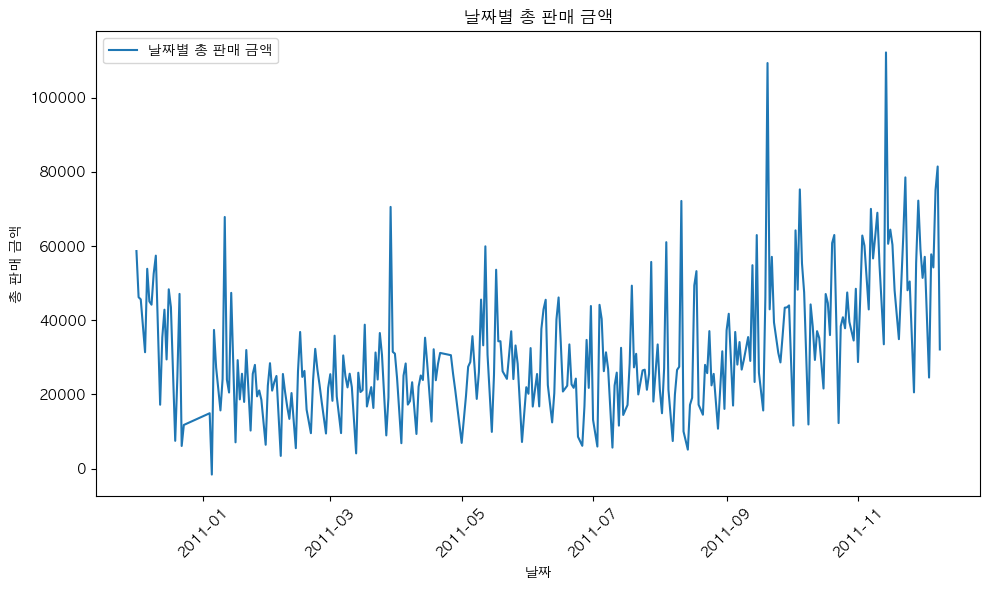

In [10]:
ecommerce_df = pd.read_csv("../00_data/ecommerce_sales.csv", encoding = 'latin1')
ecommerce_df["InvoiceDate"] = pd.to_datetime(ecommerce_df["InvoiceDate"]) # invoiceDate 컬럼을 날짜 형식으로 변경
ecommerce_df["TotalPrice"] = ecommerce_df["Quantity"] * ecommerce_df["UnitPrice"]

daily_sales = ecommerce_df.groupby(ecommerce_df["InvoiceDate"].dt.date)["TotalPrice"].sum()

plt.figure(figsize=(10, 6))
plt.rc("font", family="AppleGothic")

plt.plot(daily_sales.index, daily_sales.values, label="날짜별 총 판매 금액")
plt.title("날짜별 총 판매 금액")
plt.xlabel("날짜")
plt.xticks(rotation=45)
plt.ylabel("총 판매 금액")
plt.legend()
plt.tight_layout()
plt.show()


## 막대 그래프 그리기
막대 그래프는 카테고리 간의 비교를 시각화 할 때 매우 유용하다.<br>
각 카테고리가 갖는 값을 막대 높이로 표현하여 테이터를 직관적으로 비교할 수 있다.
- 주요사항
  - 카테고리형 데이터의 비교
  - 다른 카테고리 간의 상대적 차이 강조

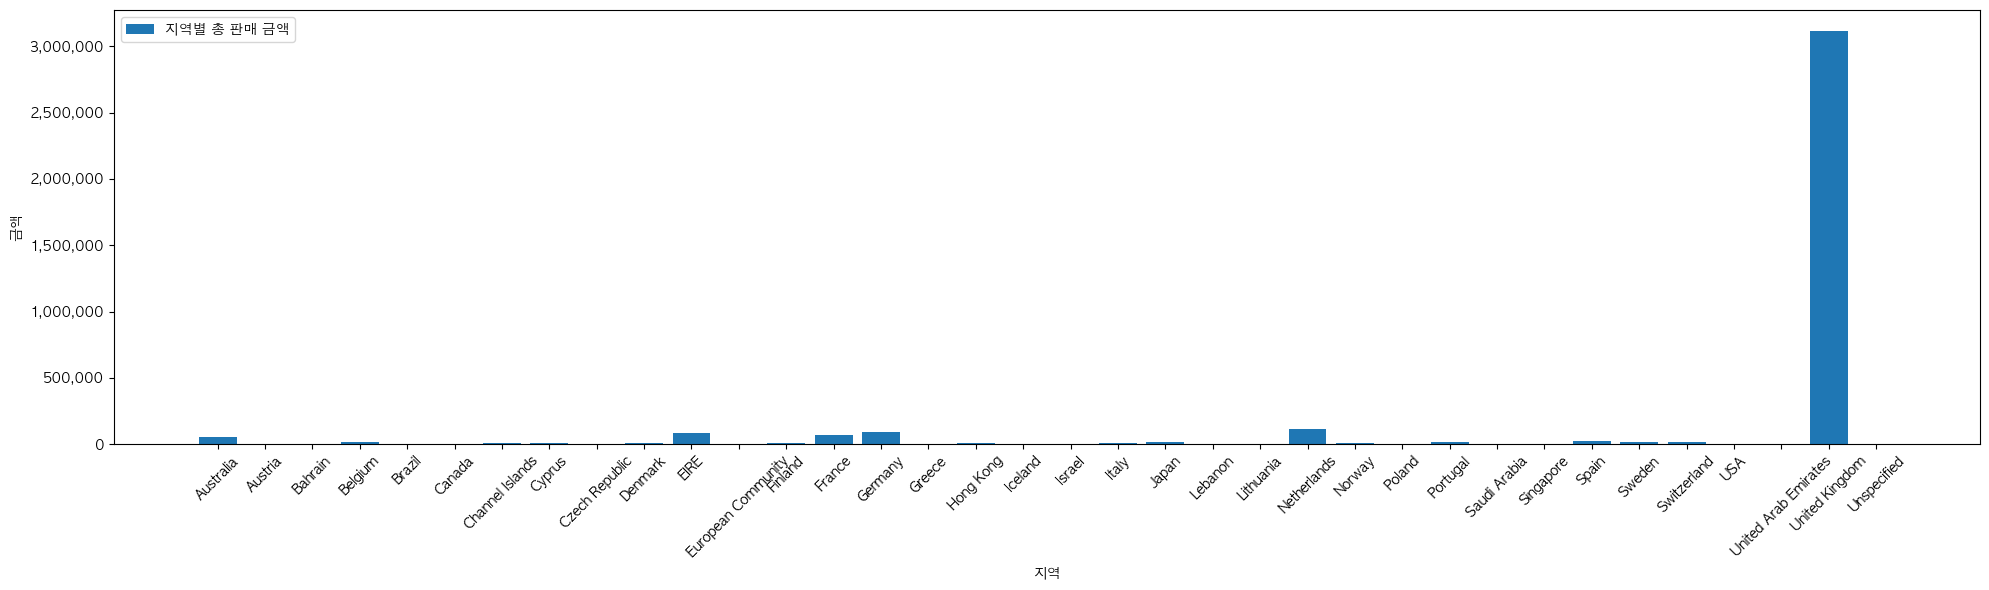

In [11]:
# 축의 값 포맷을 사용자 정의 형식으로 지정하기 위해서 사용하는 도구
from matplotlib.ticker import FuncFormatter

ecommerce_df = pd.read_csv("../00_data/ecommerce_sales.csv", encoding = 'latin1')
ecommerce_df["InvoiceDate"] = pd.to_datetime(ecommerce_df["InvoiceDate"]) # invoiceDate 컬럼을 날짜 형식으로 변경

filtered_df = ecommerce_df[(ecommerce_df["InvoiceDate"] > "2010-12-01") & (ecommerce_df["InvoiceDate"] < "2011-06-01")].copy()
filtered_df["Total"] = filtered_df["Quantity"] * filtered_df["UnitPrice"]

country_sales = filtered_df.groupby("Country")["Total"].sum()

plt.figure(figsize=(20, 6))

plt.bar(country_sales.index, country_sales.values, label="지역별 총 판매 금액")
plt.xlabel("지역")
plt.xticks(rotation=45)
plt.ylabel("금액")

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')

plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


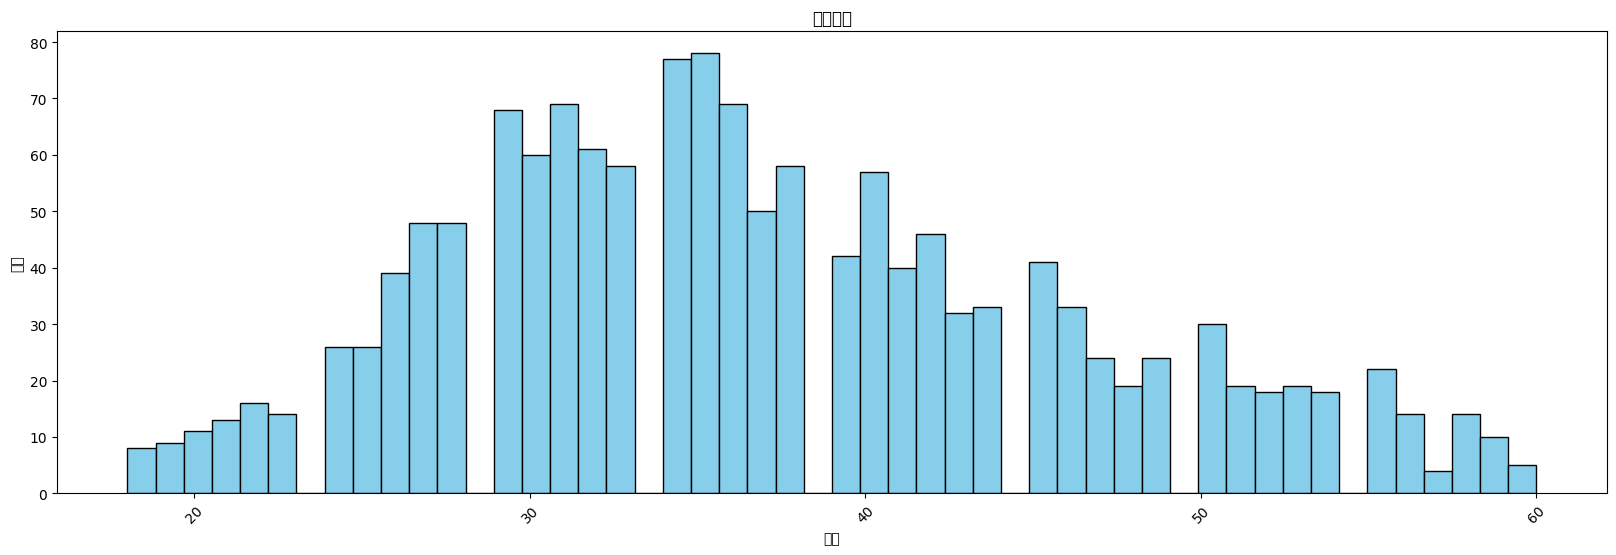

In [6]:
human_df = pd.read_csv("../00_data/Human_Resources.csv", encoding="latin1")

plt.figure(figsize=(20, 6))
plt.hist(human_df["Age"], bins=50, color="skyblue", edgecolor="black")
plt.title("나이분포")
plt.xlabel("나이")
plt.xticks(rotation=45)
plt.ylabel("분포")
plt.show()

## 산점도
산점도는 두 변수 간의 관계를 시각화 하는데 사용된다.

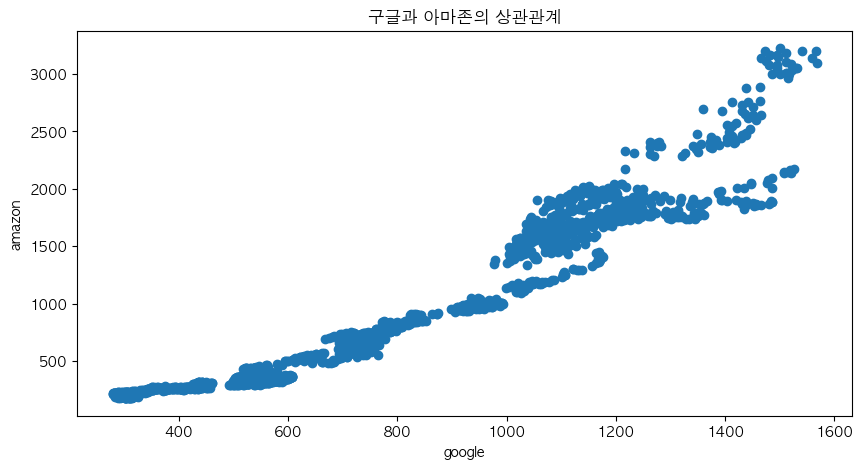

In [12]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")

goog = stock_df["GOOG"]
amzn = stock_df["AMZN"]

plt.figure(figsize=(10, 5))
plt.scatter(goog, amzn)

plt.title("구글과 아마존의 상관관계")
plt.xlabel("google")
plt.ylabel("amazon")
plt.show()

## 다중 플롯
하나의 그래프에 여러 데이터를 겹쳐서 표현할 수 있다.<br>
선 그래프나 막대 그래프에서 여러 변수를 비교할 때 유용하다.

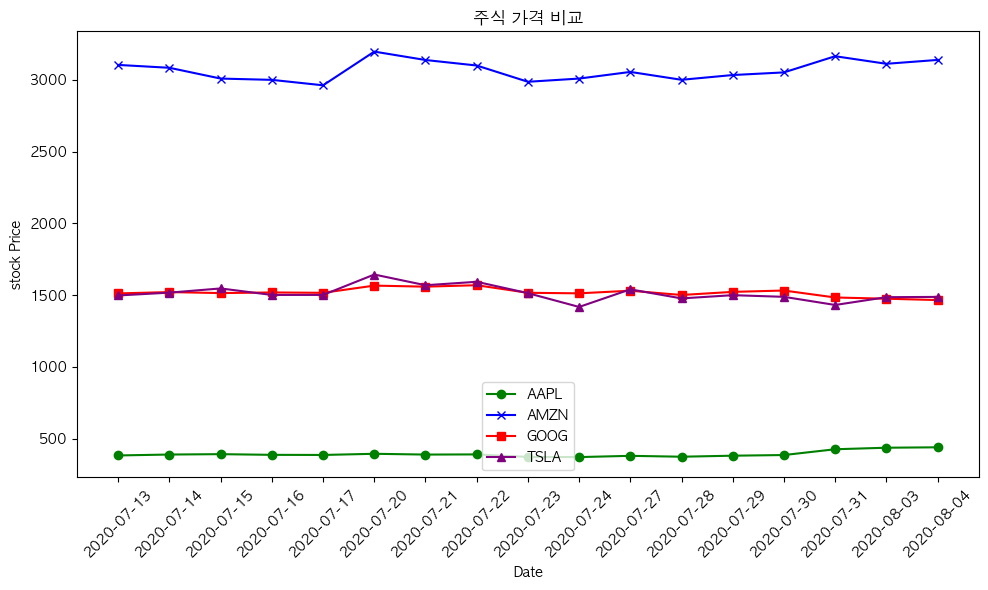

In [13]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")

filtered_stock_df = stock_df[(stock_df["Date"] > "2020-07-10") & (stock_df["Date"] < "2020-08-05")].copy()

plt.figure(figsize=(10, 6))

plt.plot(filtered_stock_df["Date"], filtered_stock_df["AAPL"], label="AAPL", color="green", marker="o")
plt.plot(filtered_stock_df["Date"], filtered_stock_df["AMZN"], label="AMZN", color="blue", marker="x")
plt.plot(filtered_stock_df["Date"], filtered_stock_df["GOOG"], label="GOOG", color="red", marker="s")
plt.plot(filtered_stock_df["Date"], filtered_stock_df["TSLA"], label="TSLA", color="purple", marker="^")

plt.title("주식 가격 비교")
plt.xlabel("Date")
plt.ylabel("stock Price")
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()

## 서브플롯
하나의 figure내에 여러 개의 그래프를 비채할 수 있다.
모든 데이터를 한눈에 시각화하여 비교하고자 하는 경우 사용한다.

In [14]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")
filtered_stock_df = stock_df[(stock_df["Date"] > "2020-07-10") & (stock_df["Date"] < "2020-08-05")].copy()

fig, axs = plt.subplot(3, 2, figsize=(14, 12))

axs[0, 0].plot(filtered_stock_df["Date"], filtered_stock_df["AAPL"], label="AAPL", color="green")
axs[0, 0].set_title("Apple stock price")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Price")
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 0].plot(filtered_stock_df["Date"], filtered_stock_df["AMZN"], label="AMZN", color="green")
axs[0, 0].set_title("Amazon stock price")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Price")
axs[0, 0].tick_params(axis='x', rotation=45)

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>